# Hacker Statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Bernoulli Process

In [0]:
def bernoulli_process(n, p, repeated=False, n_reps=1000, random_state=None):
    """
    Create bernoulli process with n trials and probability p

    Parameters
    ----------
    n : int
        Specifying the total number of trials
    p : float, between 0 and 1
        Specifying the probability of bernoulli trial happening
    repeated : bool, default True
        If True the bernolli process will be repeated n_reps (default=1000)
        return an array of success for each repetition
    n_reps : int, default 1000
        Number of repetitions performed if repeated=True

    Returns
    -------
    num_success : int, if repeated False
        Number of success for n trials
    num_successes : ndarray shape (n_reps,) if repeated True
        Array containing number of successes
    """

    def inner():
        random_arr = np.random.random(n)
        return (random_arr < p).sum()
        
    if random_state != None:
        np.random.seed(random_state)

    if repeated:
        num_successes = np.empty(n_reps)
        for i in range(n_reps):
            num_successes[i] = inner()
        return num_successes
    else:
        num_success = inner()
        return num_success

In [79]:
bernoulli_process(100, 0.1)

8

## Binomial PMF

In [0]:
def binomial_pmf(x, n, p, n_reps=10000, random_state=None):
    """
    Calculate binomial probability mass function

    Paremeters
    ----------
    x : int
        Number of successes
    n : int
        Number of bernoulli trials
    p : float
        Probability of single bernoulli trial
    n_reps : int, default 10000
        Number of repetitions using for simulation
    random_state : number, default None
        Specify the seed for pseudo-random generator

    Return
    ------
    The calculated binomial PMF
    """

    if random_state is not None:
        np.random.seed(random_state)
    
    dist = np.empty(n_reps, dtype=bool)
    for i in range(n_reps):
        random_arr = np.random.random(n)
        mask = random_arr < p
        if mask.sum() == x:
            dist[i] = True
        else:
            dist[i] = False
    return dist.mean()

In [80]:
binomial_pmf(7, 10, 0.2)

0.0006

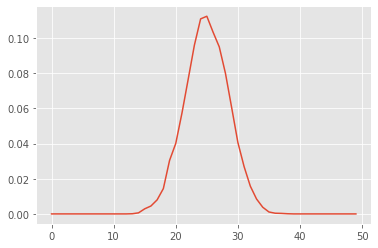

In [104]:
vectorized = np.vectorize(lambda x: binomial_pmf(x, 50, 0.5))
arr = vectorized(np.arange(50))
plt.plot(np.arange(50), arr);

## Binomial CMF

In [0]:
def binomial_cmf(x, n, p, n_reps=10000, random_state=None):
    """
    
    """